In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

happinessData = pd.read_csv(r"C:\Users\Dell\happiness_score_dataset.csv")
print(happinessData.head())
print("-------------------------")
print("-------------------------")
print(f"Shape of the data: {happinessData.shape}")
print("-------------------------")
print("-------------------------")
print(happinessData.info())

AttributeError: 'str' object has no attribute 'head'

In [22]:
happinessData.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [23]:
happinessData.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [24]:
medianHappinessScore = happinessData['Happiness Score'].median()
medianFreedom = happinessData['Freedom'].median()

In [25]:
happinessData['Happiness Score'].replace(np.nan,medianHappinessScore,inplace=True)
happinessData['Freedom'].replace(np.nan,medianFreedom,inplace=True)

In [26]:
happinessData.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [27]:
duplicateValues = happinessData.duplicated()
print(duplicateValues.sum())
happinessData[duplicateValues]

0


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [28]:
happinessData.drop_duplicates(inplace=True)

In [30]:
duplicatedValues = happinessData.duplicated()
duplicatedValues.sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

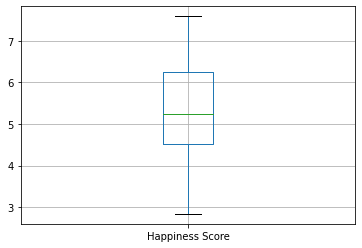

In [31]:
happinessData.boxplot(column=['Happiness Score'])
plt.show

In [42]:
def removeOutlier(col):
    sorted(col)
    quant1, quant2 = col.quantline([0.25,0.75])
    IQR = quant2 - quant1
    lowerRange = quant1 - (1.5 * IQR)
    upperRange = quant2 + (1.5 * IQR)
    return lowerRange, upperRange

<function matplotlib.pyplot.show(close=None, block=None)>

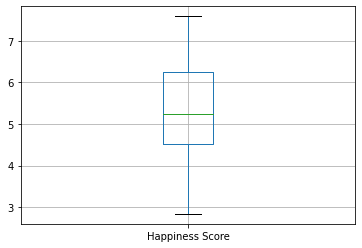

In [48]:
happinessData.boxplot(column=['Happiness Score'])
plt.show

In [51]:
from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler()
stdScale

StandardScaler()

In [52]:
happinessData['Happiness Score'] = stdScale.fit_transform(happinessData[['Happiness Score']])

In [53]:
happinessData.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,1.937360,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,1.914581,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,1.884792,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,1.880411,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,1.797179,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<AxesSubplot:>

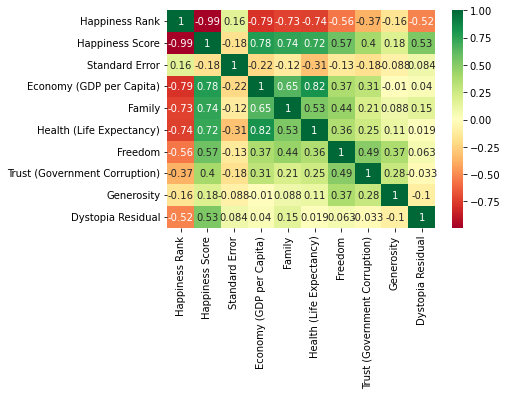

In [55]:
sns.heatmap(happinessData.corr(),annot=True,cmap='RdYlGn')

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

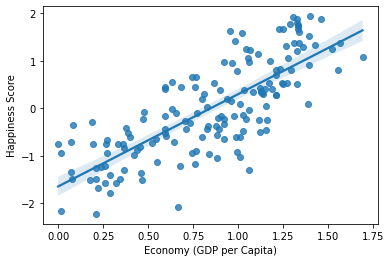

In [56]:
sns.regplot(x='Economy (GDP per Capita)',y='Happiness Score',data=happinessData)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

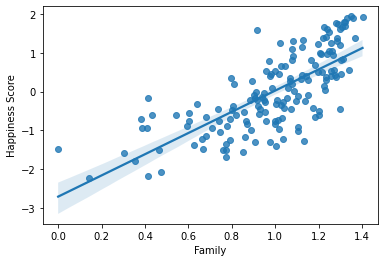

In [57]:
sns.regplot(x='Family',y='Happiness Score',data=happinessData)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

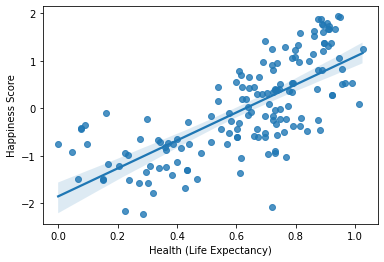

In [61]:
sns.regplot(x='Health (Life Expectancy)',y='Happiness Score',data=happinessData)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

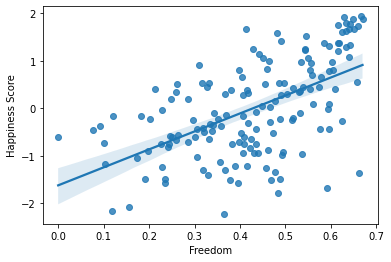

In [62]:
sns.regplot(x='Freedom',y='Happiness Score',data=happinessData)